# Importing Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
hData = pd.read_csv("C:\\Users\\aloky\\OneDrive\\Desktop\\Sentiment Analysis\\god knows\\Processed\\check-in_processed.csv")

In [3]:
hData.head()

,Unnamed: 0,Tweets,Sentiment
0,0,bangalore airport best airport ive entire indi...,Positive
1,1,digi yatra supposed reduce time apparently rig...,Positive
2,2,airindia blrairport airasia dgcaindia entered ...,Negetive
3,3,issue checking online prajawal bangera bangalo...,Positive
4,4,indigo6e true happened multiple times app does...,Positive


In [4]:
hData = hData.drop(hData.columns[hData.columns.str.contains('Unnamed', case=False)], axis=1)

In [5]:
hData.head()

,Tweets,Sentiment
0,bangalore airport best airport ive entire indi...,Positive
1,digi yatra supposed reduce time apparently rig...,Positive
2,airindia blrairport airasia dgcaindia entered ...,Negetive
3,issue checking online prajawal bangera bangalo...,Positive
4,indigo6e true happened multiple times app does...,Positive


In [6]:
hData.Sentiment.value_counts()

Sentiment
Positive    63
Negetive    26
Neutral      6
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Sentiments')

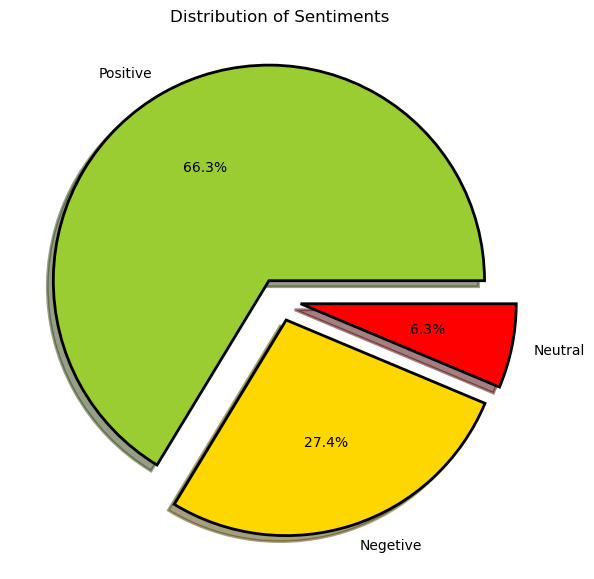

In [7]:
# Pie-Chart
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp={'linewidth':2, 'edgecolor':"black"}
tags = hData['Sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', shadow=True, colors=colors, autopct='%1.1f%%', wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of Sentiments")

## Analysis on the Negetive Tweets

In [8]:
# Collecting all the Negetive Tweets from the dataset
negetive_tweets = hData[hData.Sentiment == 'Negetive']

negetive_reviwes = negetive_tweets['Tweets'].tolist()

In [9]:
custom_stop_words = ["experience", "nice", "facilities", "staff", "domestic", "terminal", "international", 
                     "visit", "time", "comfortable","already", "amp", "guys", "pls", 'im', "us", "another",
                     "next", "god", "hope", "bless", "value", "dearest", "get" , "im", "mins", "till", "still", "already", 
                     "got", "air"]

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
new_stop_words = [frozenset(stop_words)]
stop_words = new_stop_words + custom_stop_words

In [12]:
# Weightage of the words in the tweets
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = new_stop_words)
x = vectorizer.fit_transform(negetive_reviwes)

In [13]:
# Lda model
num_topics = 10
lda = LatentDirichletAllocation(n_components = num_topics, random_state=40)
lda.fit(x)

LatentDirichletAllocation(random_state=40)

In [14]:
num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics=[]

In [15]:
# Extracting the topics from LDA model
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {',' .join(topic)}")

Topic 1: akasaair,hour,check,airport,anyone,baggage,checkin,hospitality,flight,cabin
Topic 2: airport,akasaair,baggage,check,checkin,hospitality,flight,cabin,staff,counter
Topic 3: akasaair,airline,check,since,one,disappointing,highly,airport,akasa,baggage
Topic 4: staff,mumbai,baggage,checkin,worst,akasaair,airline,excess,experience,indigo
Topic 5: airport,baggage,counter,indigo6e,experience,bad,boarding,excess,ever,pass
Topic 6: airport,check,due,security,flight,counter,bag,laptop,missed,staff
Topic 7: airport,hospitality,pathetic,mins,waiting,30,cabin,even,group,time
Topic 8: staff,checkin,took,indigo6e,open,experience,airvistara,gate,delayed,counter
Topic 9: flight,check,airport,long,missed,due,closed,one,counters,back
Topic 10: airport,staff,single,hours,checkin,blrairport,digiyatra,person,minutes,cabin


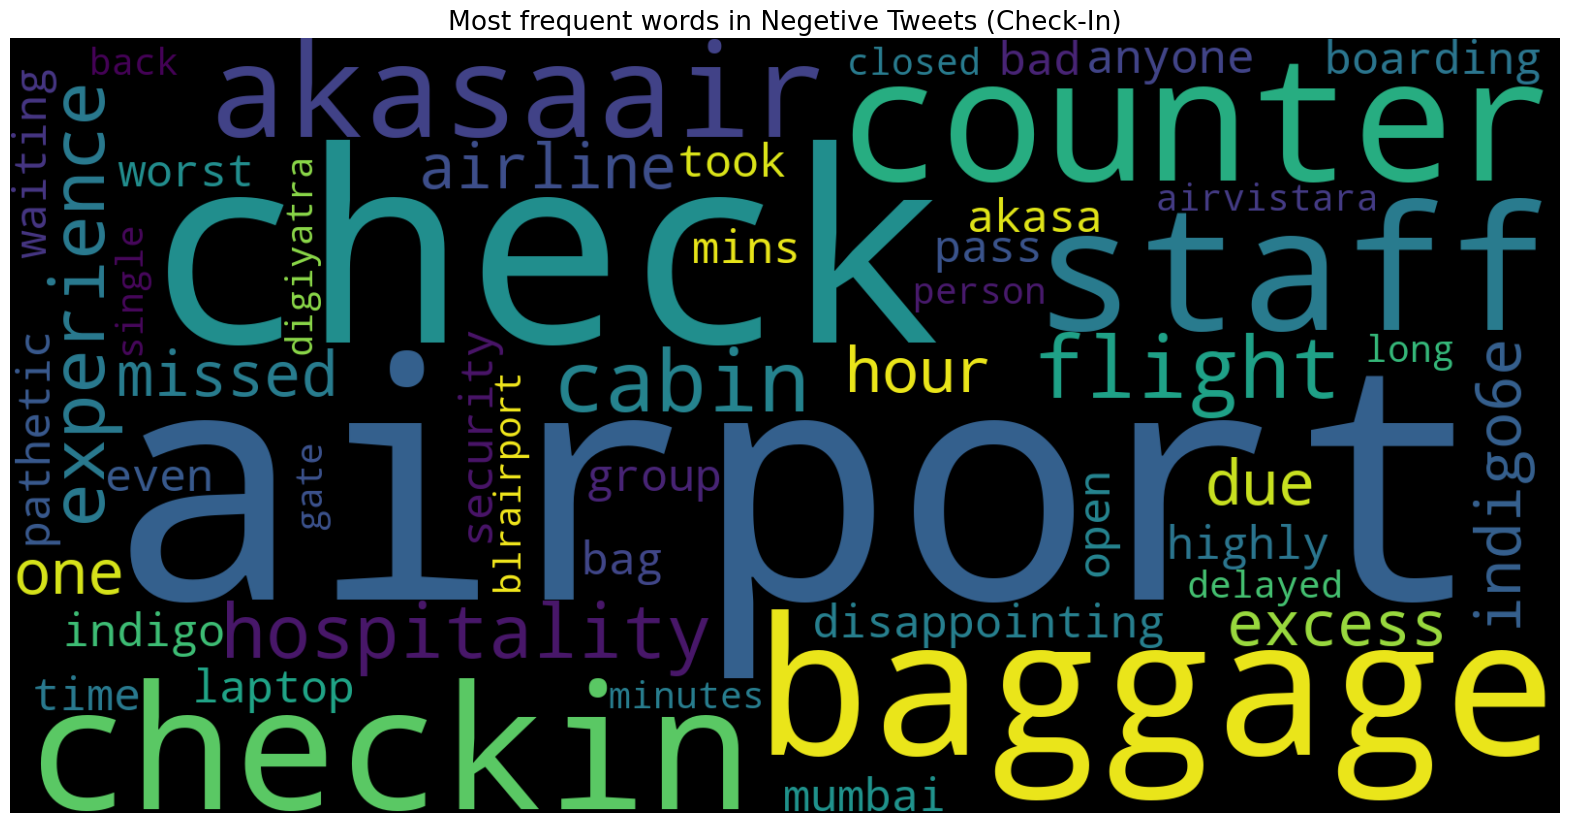

In [16]:
# WordCloud 
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud= WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negetive Tweets (Check-In)', fontsize=19)
plt.show()

# Observation for negative tweets:
## 1) Airport Management and Service Issues:
#### •	There were problems or delays in check-in and baggage handling .
#### •	There were problems with the online check-in system and lack of coordination at the airport.
#### •	Issues with the implementation of the DigiYatra system are resulting in delays and longer queues for passengers.
#### •	Long queues and slow security checks at the airport are causing passengers to miss their flights and experience delays.
## 2) Technical Glitches and Flight Delays :
#### •	Technical glitches with the check-in systems, lack of self-check-in facilities, and administrative errors are causing passenger dissatisfaction and delays at the airport. Instances of flight delays, lack of information, and mismanagement of flight schedules are causing inconvenience for travellers.
## 3) Poor Staff Behaviour:
#### •	Instances of unhelpful and rude behaviour by the airport staff, including the check-in and customer service teams, are contributing to negative experiences for passengers.


## Analysis on the Positive Tweets

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
custom_stop_words = ["experience", "nice", "facilities", "staff", "domestic", "terminal", "international", 
                     "visit", "time", "comfortable", "much", "waiting", "time", "need", "also", "first", "since",
                     "always", "please", "last", "even", "near", "entire", "lot", "many", "used", "one", "entire", "though",
                     "amp", "us", "guys", "lol", "ps", "knows", "long", "inside", "many", "got" , "mr", "new" ,"would" ,"felt",
                     "doesn't", "took", "t2", "080", "hr", "basis", "stretch", "class", "india", "issue", "httpstcouknbqrdbzr"]
stop_words = stop_words + custom_stop_words
new_stop_words = [frozenset(stop_words)]

In [18]:
# Collecting all the Positive Tweets from the dataset
positive_tweets = hData[hData.Sentiment == 'Positive']
positive_reviews = positive_tweets['Tweets'].tolist()

In [19]:
# Weightage of the words in the tweets
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = stop_words)
x = vectorizer.fit_transform(positive_reviews)

In [20]:
# Lda model
num_topics = 12
lda = LatentDirichletAllocation(n_components = num_topics, random_state=1)
lda.fit(x)

LatentDirichletAllocation(n_components=12, random_state=1)

In [21]:
num_top_words = 15
feature_names = vectorizer.get_feature_names_out()
topics=[]

In [22]:
# Extracting the topics from LDA model
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {',' .join(topic)}")

Topic 1: bangalore,see,really,lounge,dont,indigo6e,checks,less,security,mind,customer,people,scale,stop,feel
Topic 2: bangalore,hospitality,lounge,excellent,boarding,flight,warm,food,really,blrairport,best,wonderful,thanks,must,right
Topic 3: bangalore,checkin,check,flight,service,security,via,hand,baggage,wait,well,never,done,app,especially
Topic 4: good,hospitality,bangalore,service,lounge,blrairport,blrdomesticlounge,wait,flight,especially,make,say,blr,must,never
Topic 5: bengaluru,hospitality,kind,office,grateful,karyakatas,bearers,gesture,sagar,warm,amazing,spent,love,thank,like
Topic 6: bangalore,check,digi,yatra,security,dont,team,gate,15,entry,definitely,blrairport,awesome,extremely,yet
Topic 7: thank,awesome,sagar,bangalore,impressed,well,helpful,implement,process,hospitality,security,flight,check,indigo6e,checkin
Topic 8: bangalore,checkin,check,thank,airvistara,smooth,couldnt,counters,like,digiyatra,service,thanks,good,tickets,verify
Topic 9: thanks,pleasure,hospitality,loun

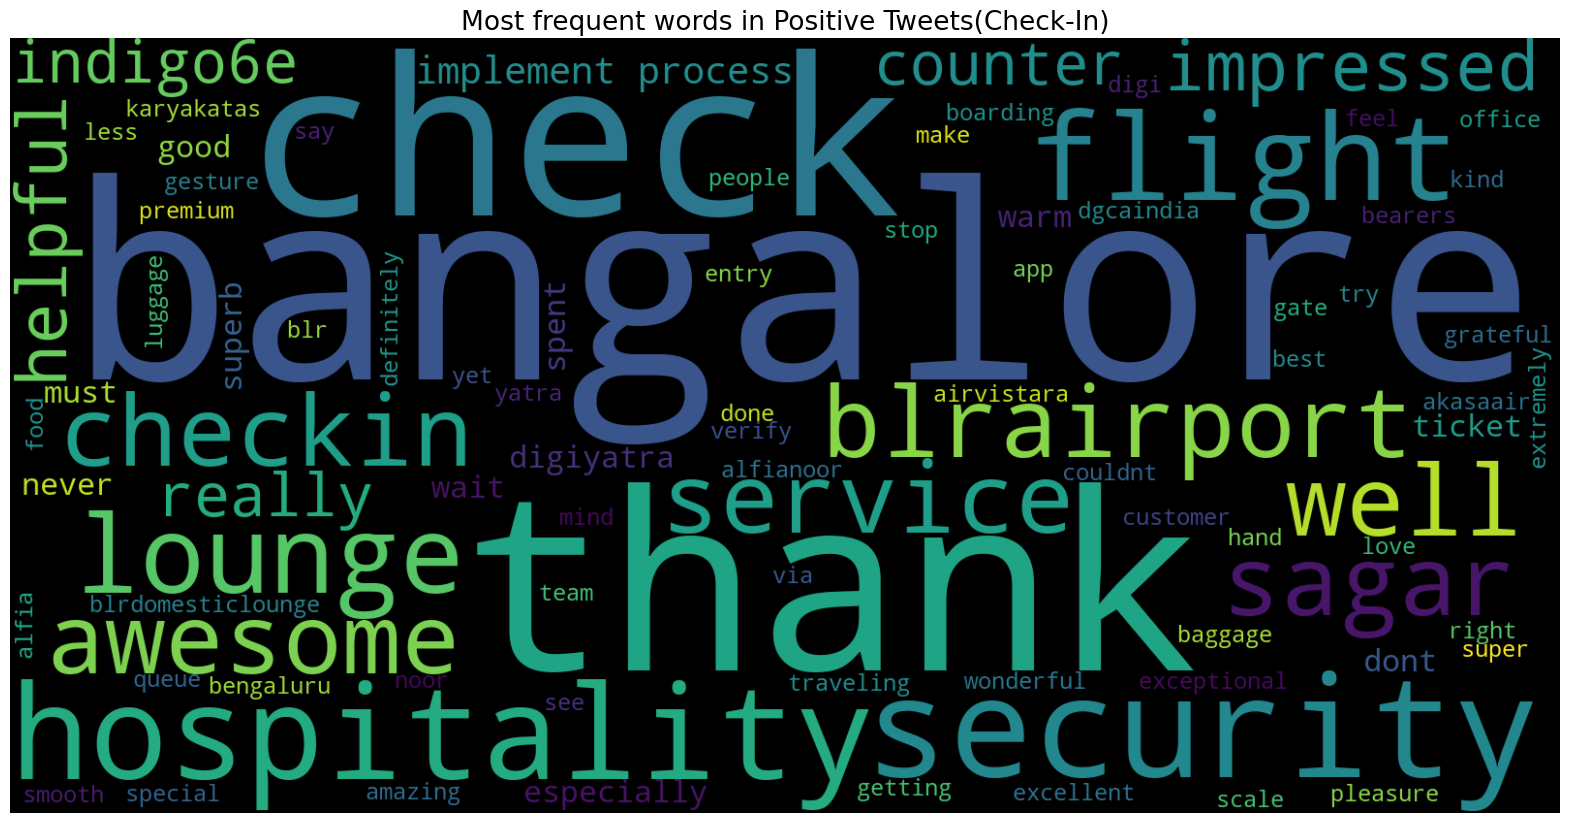

In [23]:
# WordCloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud= WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets(Check-In)', fontsize=19)
plt.show()

# Observation for positive tweets:
## 1)	Efficient Check-in Process:
#### •	The check-in process at Bangalore Airport was smooth and hassle-free which allowed passengers to complete the procedure quickly and without any unnecessary delays.
#### •	The airport has implemented innovative solutions that have reduced congestion and sped up security checks and the check-in process.
## 2)	Helpful Staff and Support:
#### •	supportive and courteous staff at the check-in counter have contributed to a pleasant and smooth check-in experience for passengers making it easier for them to navigate the airport.
## 3)	Innovative Solutions and Technology:
#### •	The airport has used modern technology which includes the DigiYatra system, to streamline and simplify the check-in process. 
